In [1]:
!pip install ultralytics


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anyio 3.7.1 requires sniffio>=1.1, which is not installed.
httpcore 1.0.2 requires h11<0.15,>=0.13, which is not installed.
httpx 0.25.2 requires sniffio, which is not installed.
openai 1.3.6 requires pydantic<3,>=1.9.0, which is not installed.
openai 1.3.6 requires sniffio, which is not installed.
tiktoken 0.5.1 requires regex>=2022.1.18, which is not installed.



  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached tqdm-4.66.5-py3-none-any.whl.metadata (57 kB)
  Using cached py_cpuinfo-9.0.0-py3-none-any.whl.metadata (794 bytes)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached ultralytics_thop-2.0.0-py3-none-any.whl.metadata (8.5 kB)
  Using cached contourpy-1.2.1-cp311-cp311-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.5-cp311-cp311-win_amd64.whl.metadata (6.5 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached idna-3.7-py3-none-any.whl.metadata (9.9 kB)
  Using cached urllib3-2.2.2-py3-none-an

In [2]:
!pip install mss

  Using cached mss-9.0.1-py3-none-any.whl.metadata (3.9 kB)
Using cached mss-9.0.1-py3-none-any.whl (22 kB)


In [2]:
def detect_img(pic):
    #load image
    img = cv2.imread(pic)

    #infer
    results = model(pic)

    for r in results:
        boxes = r.boxes
        for box in boxes:
            x1, y1, x2, y2 = box.xyxy[0]
            conf = box.conf[0]
            cls = int(box.cls[0])

            # Draw rectangle
            cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

            # Put text
            label = f'{model.names[cls]} {conf:.2f}'
            cv2.putText(img, label, (int(x1), int(y1 - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Display the image using cv2_imshow
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        #show on ntoebook
        plt.imshow(gray)
        plt.title('my picture')
        plt.show()
        # cv2.imshow('image1',img)

In [3]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np
import mss
import time

# Load the model
model = YOLO('yolov8n.pt')

pic='Screenshot 2024-08-15 162602.png'
vid='Erica.mp4'


In [5]:
# Initialize screen capture
sct = mss.mss()

# Define the region of the screen to capture (adjust as needed)
monitor = {"top": 0, "left": 0, "width": 1920, "height": 1080}


# Set desired FPS
target_fps = 0.5
frame_time = 1 / target_fps

while True:
    start_time = time.time()

    # Capture the screen
    screenshot = np.array(sct.grab(monitor))
    
    # Convert BGR to RGB
    frame = cv2.cvtColor(screenshot, cv2.COLOR_RGBA2RGB)
    
    # Perform tracking
    # results = model.track(, persist=True)
    results = model.track(source=frame, show=False, save=True, name='test_result', persist=True, classes=18)
    # Process and display results
    annotated_frame = results[0].plot()
    
    # Display the frame
    cv2.imshow("YOLO Tracking", annotated_frame)
    
    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    # Control frame rate
    elapsed_time = time.time() - start_time
    sleep_time = max(0, frame_time - elapsed_time)
    time.sleep(sleep_time)

cv2.destroyAllWindows()


0: 384x640 2 sheeps, 604.4ms
Speed: 4.0ms preprocess, 604.4ms inference, 2.7ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\test_result

0: 384x640 (no detections), 684.0ms
Speed: 0.8ms preprocess, 684.0ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\test_result2

0: 384x640 2 sheeps, 665.3ms
Speed: 17.8ms preprocess, 665.3ms inference, 16.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\test_result3

0: 384x640 (no detections), 610.3ms
Speed: 3.7ms preprocess, 610.3ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\test_result4

0: 384x640 2 sheeps, 582.5ms
Speed: 0.0ms preprocess, 582.5ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\test_result5

0: 384x640 (no detections), 565.5ms
Speed: 0.0ms preprocess, 565.5ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)


KeyboardInterrupt: 

In [26]:
s=model.track(vid)



WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/1893) d:\BNI\roadmap ai\Erica.mp4: 384x640 (no detections), 77.5ms
video 1/1 (frame 2/1893) d:\BNI\roadmap ai\Erica.mp4: 384x640 (no detections), 50.8ms
video 1/1 (frame 3/1893) d:\BNI\roadmap ai\Erica.mp4: 384x640 (no detections), 36.2ms
video 1/1 (frame 4/1893) d:\BNI\roadmap ai\Erica.mp4: 384x640 (no detections), 30.5ms
video 1/1 (frame 5/1893) d:\BNI\roadmap ai\Erica.mp4: 384x640 (no detections), 32.2ms
video 1/1 (frame 6/1893) d:\

In [23]:
s

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p


image 1/1 d:\BNI\roadmap ai\Screenshot 2024-08-15 162602.png: 512x640 1 person, 3 bowls, 1 pizza, 1 dining table, 110.2ms
Speed: 25.7ms preprocess, 110.2ms inference, 15.7ms postprocess per image at shape (1, 3, 512, 640)


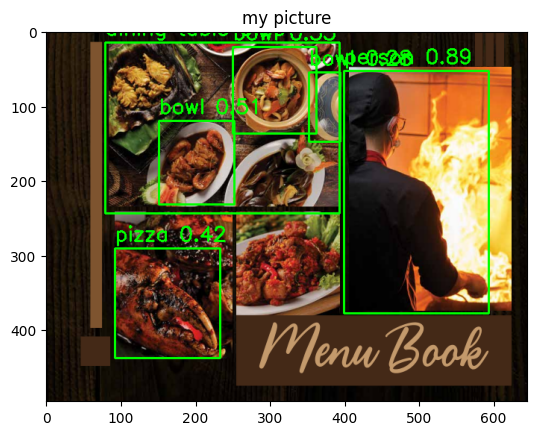

In [19]:
detect_img(pic)

image 1/1 d:\BNI\roadmap ai\atwin meme 2.jpg: 640x480 2 persons, 67.7ms
Speed: 3.3ms preprocess, 67.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


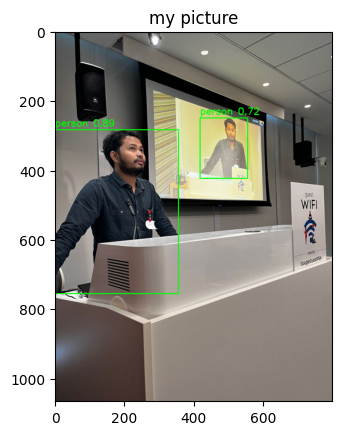

In [15]:
detect_img(pics['menu1'])